In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# ### 1. Load and Understand the Dataset
# Load the Heart Disease dataset
data = pd.read_csv(r'C:\Users\kvini\PycharmProjects\JupyterProject\data\heart.csv')

# Display basic information
print("Dataset Information:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal 

In [2]:
# ### 2. Data Preprocessing
# Define features (X) and target variable (y)
X = data.drop('target', axis=1)
y = data['target']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
# Standardization is important because it:
# 1. Ensures all features are on the same scale
# 2. Prevents features with larger magnitudes from dominating the model
# 3. Helps gradient descent converge faster
# 4. Improves the performance of many machine learning algorithms
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# ### 3. Train a Logistic Regression Model
# Train logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test_scaled)

In [4]:
# ### 4. L1 (Lasso) and L2 (Ridge) regularization within Logistic Regression
# Lasso Regularization (L1)
lasso_model = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', random_state=42)
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)

# Ridge Regularization (L2)
ridge_model = LogisticRegressionCV(cv=5, penalty='l2', random_state=42)
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)

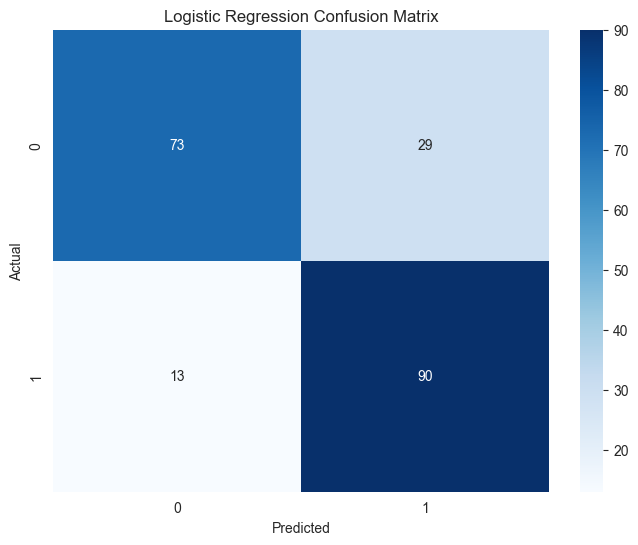

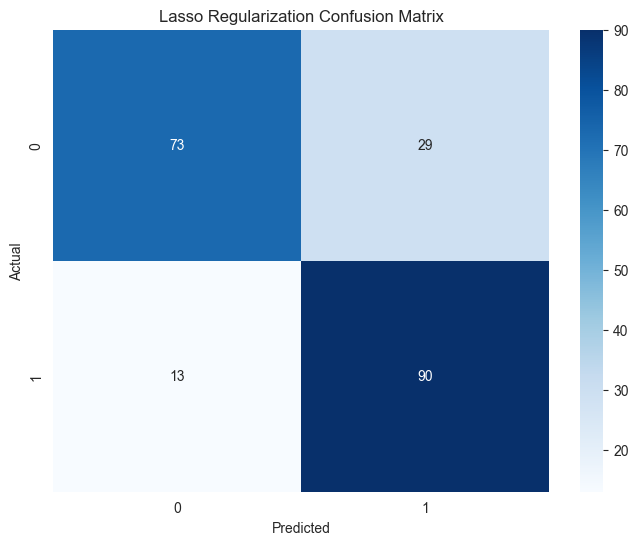

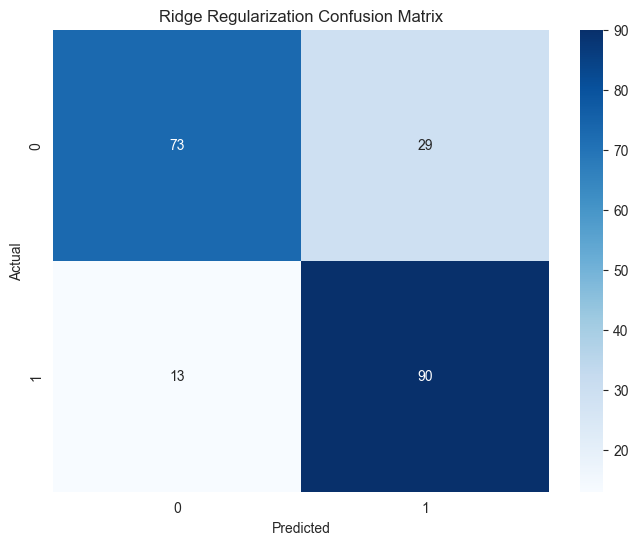


Model Performance Comparison:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.795122   0.756303  0.873786  0.810811
Lasso (L1)           0.795122   0.756303  0.873786  0.810811
Ridge (L2)           0.795122   0.756303  0.873786  0.810811


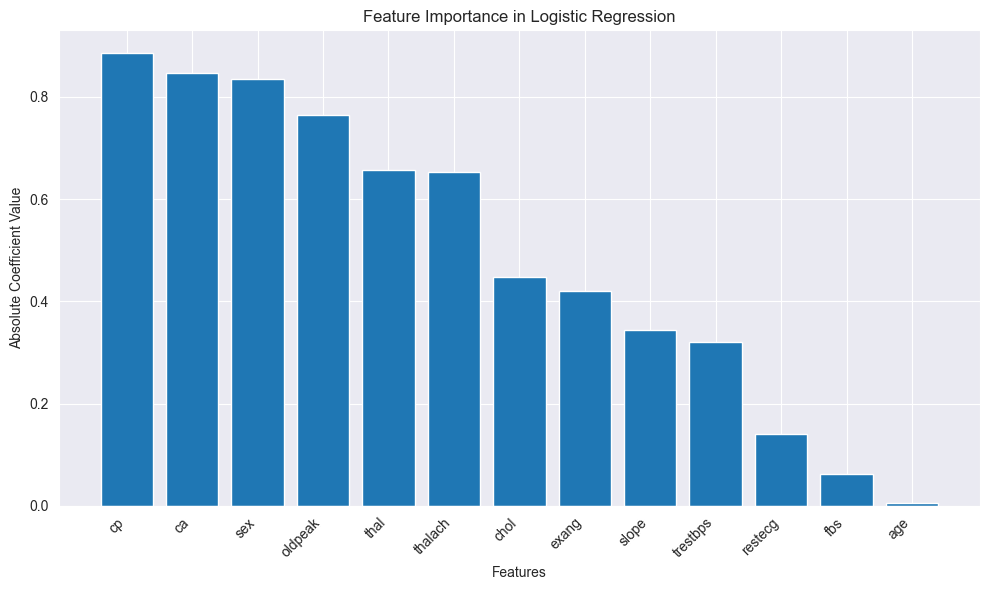

In [5]:
# ### 5. Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_test, lr_predictions, 'Logistic Regression Confusion Matrix')
plot_confusion_matrix(y_test, lasso_predictions, 'Lasso Regularization Confusion Matrix')
plot_confusion_matrix(y_test, ridge_predictions, 'Ridge Regularization Confusion Matrix')

# ### 6. Model Performance Evaluation
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, predictions),
        'Precision': precision_score(y_test, predictions),
        'Recall': recall_score(y_test, predictions),
        'F1-Score': f1_score(y_test, predictions)
    }

# Evaluate each model
results = {
    'Logistic Regression': evaluate_model(lr_model, X_test_scaled, y_test),
    'Lasso (L1)': evaluate_model(lasso_model, X_test_scaled, y_test),
    'Ridge (L2)': evaluate_model(ridge_model, X_test_scaled, y_test)
}

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nModel Performance Comparison:")
print(results_df)

# Feature Importance for Logistic Regression
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(lr_model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()